# Sckitilearn 2.0

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 2. Choosing the right eatimator/algorithm for your problem

Things to note :

    * Sklearn refers to machine learning models,algorithms as estimators
    * Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator 
    * Regression problem - predicting a number (selling price of a car)

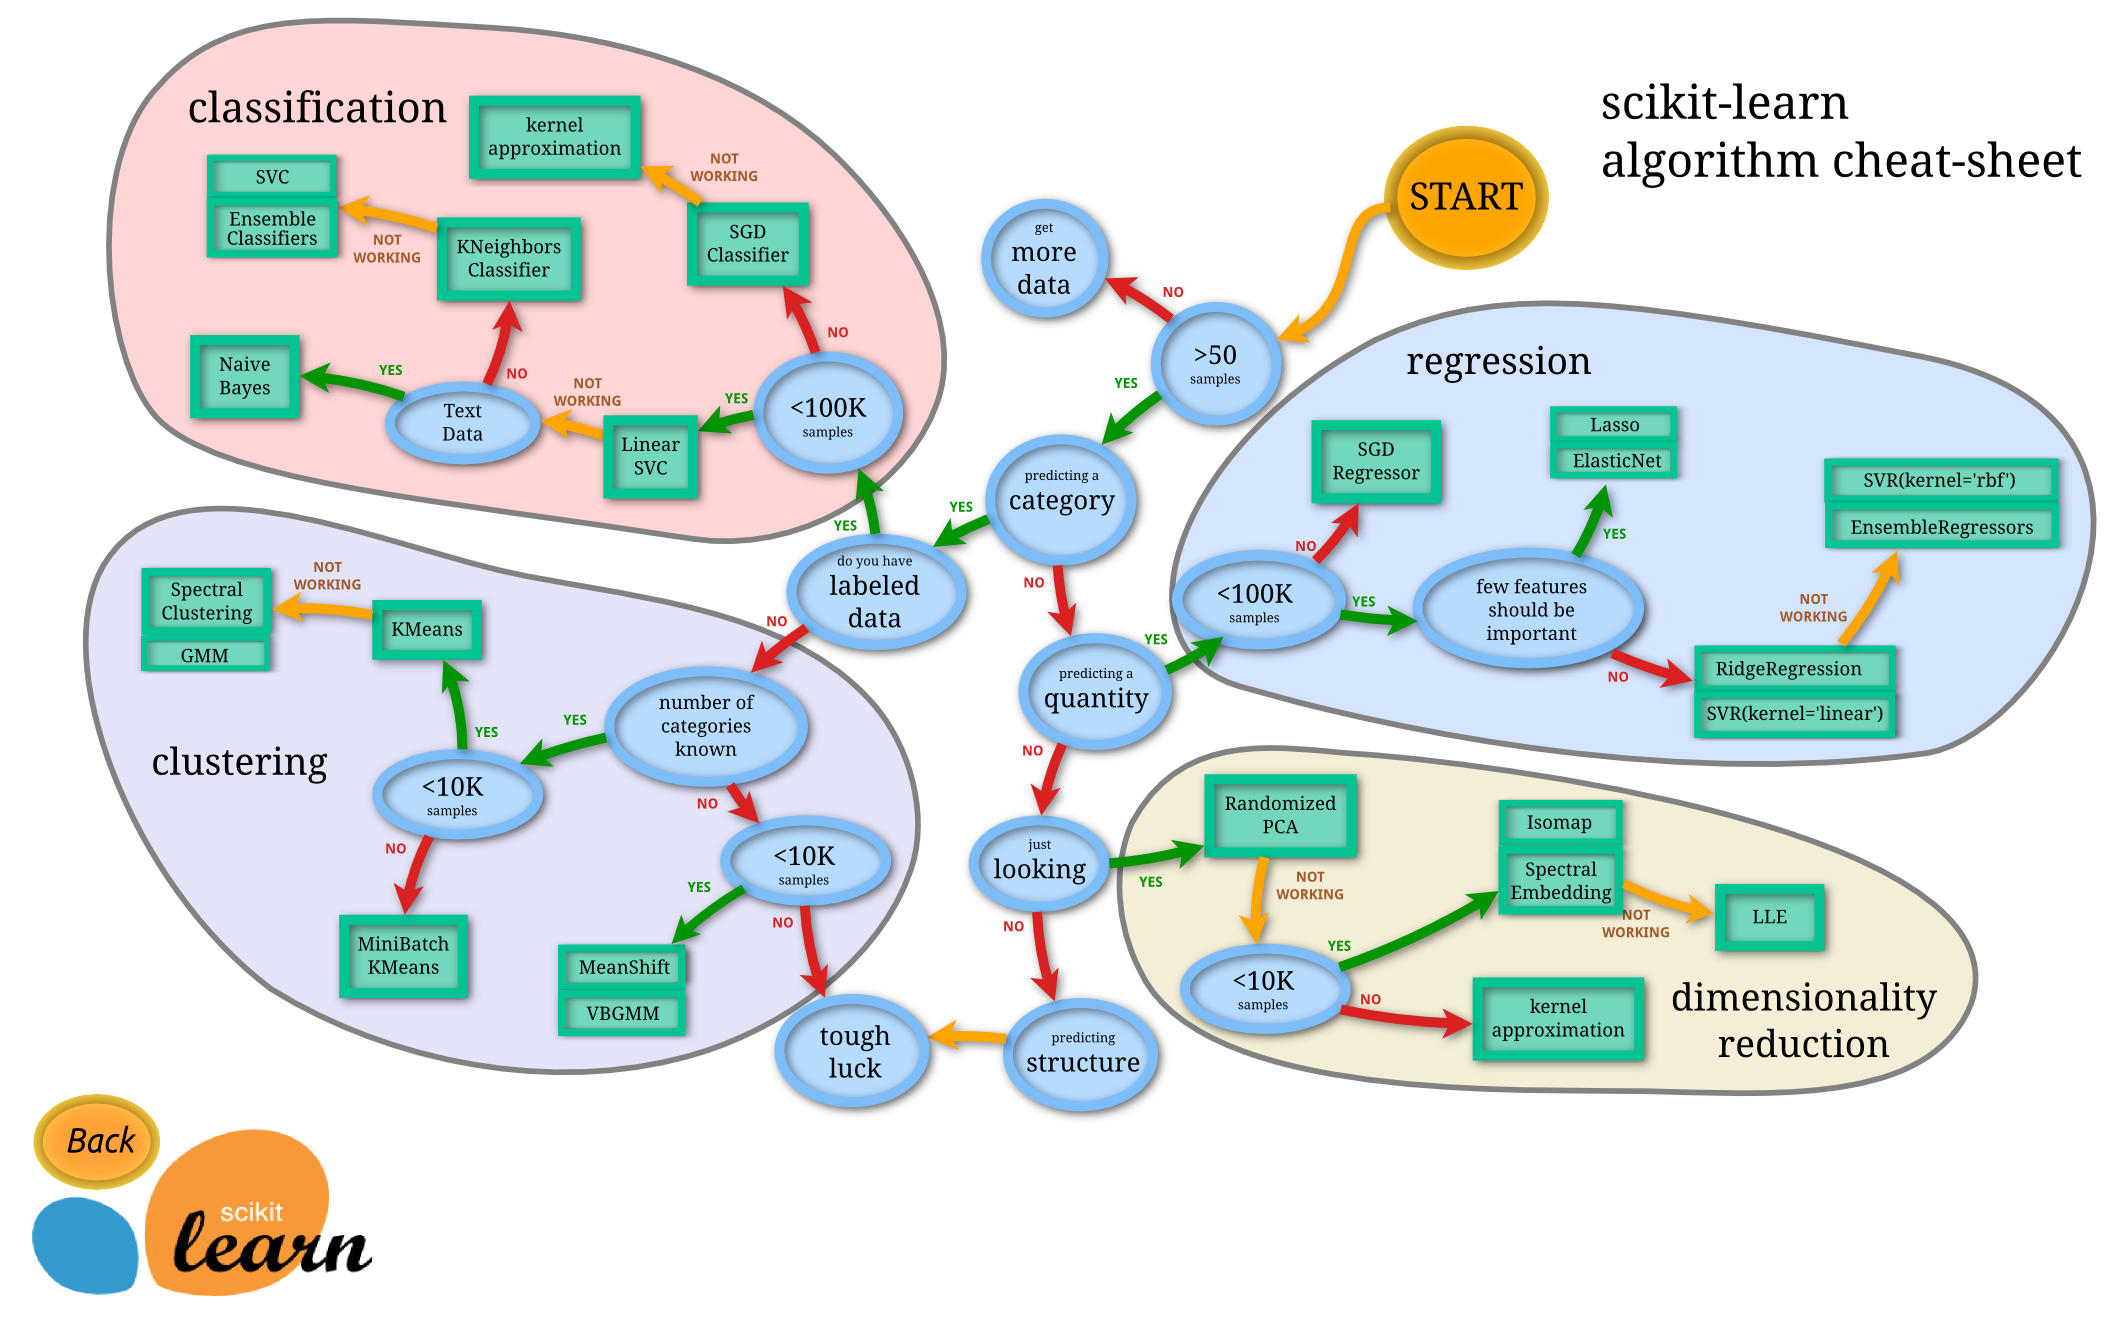

# 2.1 Picking a machine learning model for a regression problem

In [19]:
# Get california Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [20]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
if "MedHouseVal" in housing_df.columns:
    housing_df = housing_df.drop("MedHouseVal", axis=1)

In [23]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


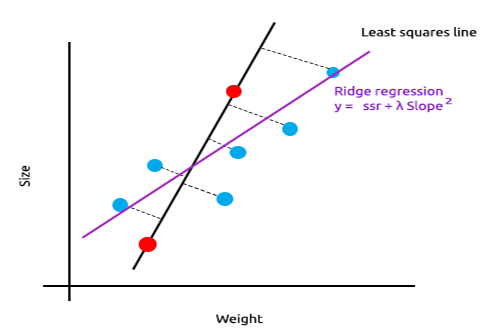

## Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization.

In [24]:
# import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=Ridge()
model.fit(x_train,y_train)

# Check the score of the model (on the test set)
model.score(x_test,y_test)

0.5758549611440127

# Ensemble methods

### Ensemble methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

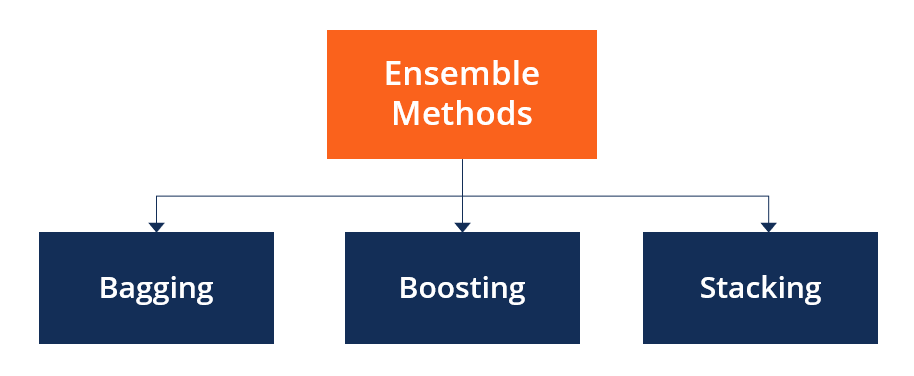

# RandomForestRegressor

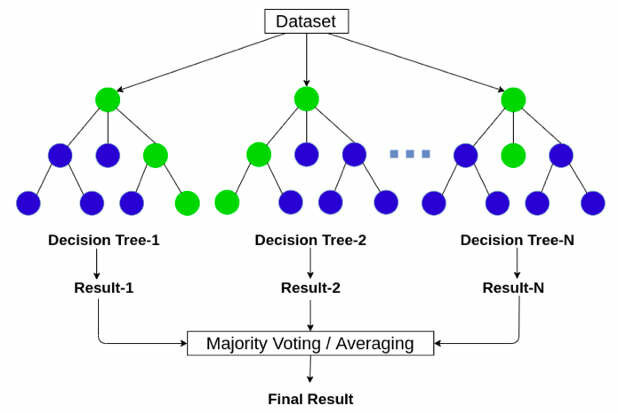
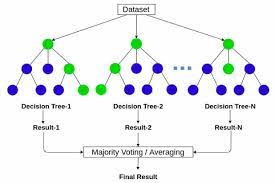

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of the model (on the test set)
model.score(x_test,y_test)

0.8065734772187598

# 2.2 Picking a machine learning model for a classification problem 

In [26]:
heart_disease=pd.read_csv("92 - heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# LinearSVC ( Linear Support Vector Classification )

### The main differences between LinearSVC and SVC lie in the loss function used by default, and in the handling of intercept regularization between those two implementations

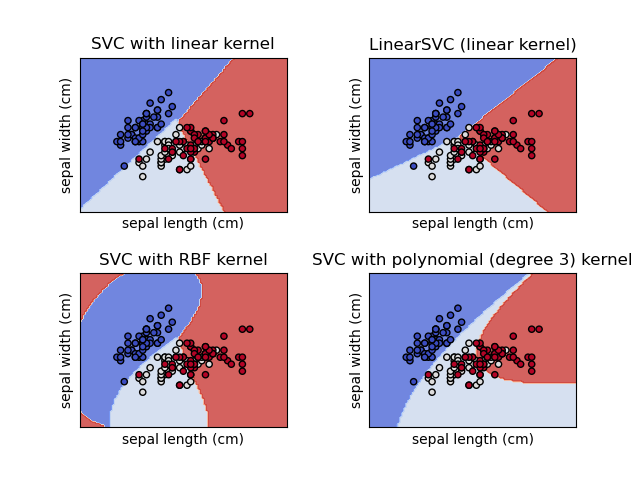

In [28]:
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate LinearSVC
# clf=LinearSVC()
clf=LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)

# Evaluate the LinearSvc
clf.score(x_test,y_test)

0.8688524590163934

In [29]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# RandomForestClassifier

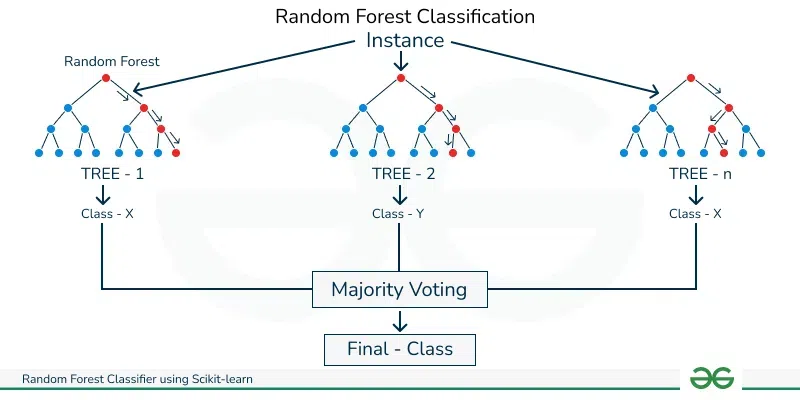

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
# model=RandomForestClassifier()
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

# Check the score of the model (on the test set)
model.score(x_test,y_test)

0.8524590163934426

## Tidbit:
    1. have structured data, used ensemble methods
    2. have unstructured data,use deep learning or tranfer learning 